In [1]:
import pandas as pd
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from bs4 import BeautifulSoup

from tensorflow import keras
from tensorflow.keras import layers
stopwords = stopwords.words("english")

# neural
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

In [3]:

# Remove HTML
def remove_HTML(text):
    return BeautifulSoup(text, 'html').get_text() 

df = pd.read_csv("data.csv", encoding='utf8')
df['title']=df['title'].astype(str)
df['politicallean'] = df['politicallean'].replace(['Liberal'],'1')
df['politicallean'] = df['politicallean'].replace(['Conservative'],'0')
df['politicallean']=df['politicallean'].astype(int)
# df['title']=df['title'].astype(str)
rdf = pd.read_csv("reddit_politics.csv", encoding = 'utf8')
# removing bad entries
rdf = rdf[rdf.title != "comment"]
rdf['title']=rdf['title'].astype(str)

blazedf = pd.read_csv("BlazeTV_Data_Descriptions.csv")
blazedf['title']=blazedf['title'].astype(str)
blazedf['title'] = df['title'].apply(remove_HTML)

cnndf = pd.read_csv("CNN_Data_Descriptions.csv")
cnndf['title']=cnndf['title'].astype(str)
cnndf['title'] = cnndf['title'].str.replace('CNN', '')


cnndf['title'] = cnndf['title'].apply(remove_HTML)

nbcdf = pd.read_csv("NBC_Data_Descriptions.csv")
nbcdf['title']=nbcdf['title'].astype(str)
nbcdf['title'] = nbcdf['title'].apply(remove_HTML)


pbsdf = pd.read_csv("PBS_Data_Descriptions.csv")
pbsdf['title']=pbsdf['title'].astype(str)
pbsdf = pbsdf[pbsdf["title"].str.contains("Stream your PBS favorites")==False]
pbsdf['title'] = pbsdf['title'].apply(remove_HTML)


fdf = pd.read_csv("FoxNews_Data_Descriptions.csv")
fdf['title']=fdf['title'].astype(str)
fdf['title'] = fdf['title'].apply(remove_HTML)




In [4]:
#Cleaning Data

# removing punctuation
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['no_punctuation'] = df['title'].apply(remove_punct)
# df['no_punctuation']


rdf['no_punctuation'] = rdf['title'].apply(remove_punct)

blazedf['no_punctuation'] = blazedf['title'].apply(remove_punct)

cnndf['no_punctuation'] = cnndf['title'].apply(remove_punct)

nbcdf['no_punctuation'] = nbcdf['title'].apply(remove_punct)

pbsdf['no_punctuation'] = pbsdf['title'].apply(remove_punct)

fdf['no_punctuation'] = fdf['title'].apply(remove_punct)

In [5]:
df['no_punctuation_lowercase'] = df['no_punctuation'].apply(lambda x: x.lower())
df['no_punctuation_lowercase']

rdf['no_punctuation_lowercase'] = rdf['no_punctuation'].apply(lambda x: x.lower())
# rdf['no_punctuation_lowercase']

blazedf['no_punctuation_lowercase'] = blazedf['no_punctuation'].apply(lambda x: x.lower())
# blazedf['no_punctuation_lowercase']

cnndf['no_punctuation_lowercase'] = cnndf['no_punctuation'].apply(lambda x: x.lower())


nbcdf['no_punctuation_lowercase'] = nbcdf['no_punctuation'].apply(lambda x: x.lower())


pbsdf['no_punctuation_lowercase'] = pbsdf['no_punctuation'].apply(lambda x: x.lower())


fdf['no_punctuation_lowercase'] = fdf['no_punctuation'].apply(lambda x: x.lower())


In [6]:
# Removing stopwords
def remove_stopwords(text):
    global stopwords
    new = []
    #print(word_tokenize(text))
    for el in word_tokenize(text):
        if not el in stopwords:
            new.append(el)
    return ' '.join(new)

df['no_punctuation_no_stopwords'] = df['no_punctuation_lowercase'].apply(remove_stopwords)
df['no_punctuation_no_stopwords']

rdf['no_punctuation_no_stopwords'] = rdf['no_punctuation_lowercase'].apply(remove_stopwords)
# rdf['no_punctuation_no_stopwords']

blazedf['no_punctuation_no_stopwords'] = blazedf['no_punctuation_lowercase'].apply(remove_stopwords)
# blazedf['no_punctuation_no_stopwords']

cnndf['no_punctuation_no_stopwords'] = cnndf['no_punctuation_lowercase'].apply(remove_stopwords)

nbcdf['no_punctuation_no_stopwords'] = nbcdf['no_punctuation_lowercase'].apply(remove_stopwords)


pbsdf['no_punctuation_no_stopwords'] = pbsdf['no_punctuation_lowercase'].apply(remove_stopwords)


fdf['no_punctuation_no_stopwords'] = fdf['no_punctuation_lowercase'].apply(remove_stopwords)


In [7]:
# Stemming words. "speaker -> speak"
def stemm(text):
    stemmer = PorterStemmer(PorterStemmer.ORIGINAL_ALGORITHM)
    new = []
    for word in word_tokenize(text):
        new.append(stemmer.stem(word))
    return ' '.join(new)

# df['stemmed'] = df['no_punctuation_no_stopwords'].apply(stemm)

df['stemmed'] = df['no_punctuation_no_stopwords'].apply(stemm)
# df['stemmed']

rdf['stemmed'] = rdf['no_punctuation_no_stopwords'].apply(stemm)
# rdf['stemmed']

blazedf['stemmed'] = blazedf['no_punctuation_no_stopwords'].apply(stemm)
# blazedf['stemmed']

cnndf['stemmed'] = cnndf['no_punctuation_no_stopwords'].apply(stemm)


nbcdf['stemmed'] = nbcdf['no_punctuation_no_stopwords'].apply(stemm)


pbsdf['stemmed'] = pbsdf['no_punctuation_no_stopwords'].apply(stemm)


fdf['stemmed'] = fdf['no_punctuation_no_stopwords'].apply(stemm)


In [11]:
# Lemmatization

def lematize(text):
    stemmer = WordNetLemmatizer()
    new = []
    for word in word_tokenize(text):
        new.append(stemmer.lemmatize(word))
    return ' '.join(new)

df['lematized'] = df['no_punctuation_no_stopwords'].apply(lematize)
df['lematized']

rdf['lematized'] = rdf['no_punctuation_no_stopwords'].apply(lematize)

blazedf['lematized'] = blazedf['no_punctuation_no_stopwords'].apply(lematize)

cnndf['lematized'] = cnndf['no_punctuation_no_stopwords'].apply(lematize)

nbcdf['lematized'] = nbcdf['no_punctuation_no_stopwords'].apply(lematize)

pbsdf['lematized'] = pbsdf['no_punctuation_no_stopwords'].apply(lematize)

fdf['lematized'] = fdf['no_punctuation_no_stopwords'].apply(lematize)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# In TfidfVectorizer we consider overall document weightage
# of a word. It helps us in dealing with most frequent words.
# Using it we can penalize them. TfidfVectorizer weights the
# word counts by a measure of how often they appear in the documents.
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [9]:
# standart
import numpy as np
import pandas as pd 

from numpy.random import seed
seed(42)

# visualization
import matplotlib.pyplot as plt
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

# text
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from string import punctuation
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['lematized'], df['politicallean'], random_state = 0)


In [13]:
NUM_WORDS = 6000 # number of features
EMBEDDING_SIZE = 128 

In [14]:
tokenizer = Tokenizer(num_words=NUM_WORDS)

tokenizer.fit_on_texts(list(X_train))
X_train_tokenized = tokenizer.texts_to_sequences(X_train) #list of tokenized sentences
X_val_tokenized = tokenizer.texts_to_sequences(X_test)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        12854 non-null  object
 1   politicallean                12854 non-null  int32 
 2   score                        12854 non-null  int64 
 3   id                           12854 non-null  object
 4   subreddit                    12854 non-null  object
 5   URL                          12854 non-null  object
 6   numcomments                  12854 non-null  int64 
 7   text                         2428 non-null   object
 8   date                         12854 non-null  int64 
 9   no_punctuation               12854 non-null  object
 10  no_punctuation_lowercase     12854 non-null  object
 11  no_punctuation_no_stopwords  12854 non-null  object
 12  stemmed                      12854 non-null  object
 13  lematized                    12

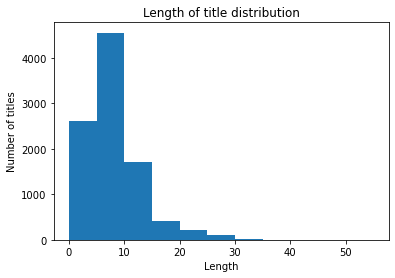

In [15]:
total_num_words = [len(one_title) for one_title in X_train_tokenized]
plt.hist(total_num_words, bins = np.arange(0,60,5))
plt.xlabel("Length")
plt.ylabel("Number of titles")
plt.title("Length of title distribution")
plt.show()

In [16]:
MAX_LEN = max(total_num_words)
X_train_padded = pad_sequences(X_train_tokenized, maxlen=MAX_LEN)
X_val_padded = pad_sequences(X_val_tokenized, maxlen=MAX_LEN)
X_train_padded

array([[   0,    0,    0, ..., 1244,  267,   10],
       [   0,    0,    0, ..., 3672, 4704,  810],
       [   0,    0,    0, ..., 1363,  994,  380],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 1340, 4247, 2503],
       [   0,    0,    0, ...,    0,  476,   62]])

In [17]:
model = Sequential()
model.add(Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(120, return_sequences=True, name='lstm_layer')))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['AUC'])

In [17]:
BATCH_SIZE = 32
EPOCHS = 2

model.fit(X_train_padded, y_train, batch_size=BATCH_SIZE, 
          epochs=EPOCHS, validation_data=(X_val_padded, y_test))

Epoch 1/2
302/302 [==============================] - 11s 29ms/step - loss: 0.6076 - auc: 0.6605 - val_loss: 0.5045 - val_auc: 0.8081
Epoch 2/2
302/302 [==============================] - 8s 27ms/step - loss: 0.4302 - auc: 0.8705 - val_loss: 0.4923 - val_auc: 0.8186


In [16]:
rdftokenizer = Tokenizer(num_words=NUM_WORDS)

rdftokenizer.fit_on_texts(list(rdf.no_punctuation_no_stopwords))
rdf_tokenized = tokenizer.texts_to_sequences(rdf.no_punctuation_no_stopwords) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

rdf_padded = pad_sequences(rdf_tokenized, maxlen=MAX_LEN)


#######################################

blazedftokenizer = Tokenizer(num_words=NUM_WORDS)

blazedftokenizer.fit_on_texts(list(blazedf.no_punctuation_no_stopwords))
blazedf_tokenized = tokenizer.texts_to_sequences(blazedf.no_punctuation_no_stopwords) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

blazedf_padded = pad_sequences(blazedf_tokenized, maxlen=MAX_LEN)

#######################################

#######################################

cnndftokenizer = Tokenizer(num_words=NUM_WORDS)

cnndftokenizer.fit_on_texts(list(cnndf.no_punctuation_no_stopwords))
cnndf_tokenized = tokenizer.texts_to_sequences(cnndf.no_punctuation_no_stopwords) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

cnndf_padded = pad_sequences(cnndf_tokenized, maxlen=MAX_LEN)

#######################################

#######################################

nbcdftokenizer = Tokenizer(num_words=NUM_WORDS)

nbcdftokenizer.fit_on_texts(list(nbcdf.no_punctuation_no_stopwords))
nbcdf_tokenized = tokenizer.texts_to_sequences(nbcdf.no_punctuation_no_stopwords) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

nbcdf_padded = pad_sequences(nbcdf_tokenized, maxlen=MAX_LEN)

#######################################

#######################################

pbsdftokenizer = Tokenizer(num_words=NUM_WORDS)

pbsdftokenizer.fit_on_texts(list(pbsdf.no_punctuation_no_stopwords))
pbsdf_tokenized = tokenizer.texts_to_sequences(pbsdf.no_punctuation_no_stopwords) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

pbsdf_padded = pad_sequences(pbsdf_tokenized, maxlen=MAX_LEN)

#######################################


#######################################
fdftokenizer = Tokenizer(num_words=NUM_WORDS)

fdftokenizer.fit_on_texts(list(fdf.no_punctuation_no_stopwords))
fdf_tokenized = tokenizer.texts_to_sequences(fdf.no_punctuation_no_stopwords) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

fdf_padded = pad_sequences(fdf_tokenized, maxlen=MAX_LEN)

#######################################

In [18]:
rdftokenizer = Tokenizer(num_words=NUM_WORDS)

rdftokenizer.fit_on_texts(list(rdf.lematized))
rdf_tokenized = tokenizer.texts_to_sequences(rdf.lematized) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

rdf_padded = pad_sequences(rdf_tokenized, maxlen=MAX_LEN)


#######################################

blazedftokenizer = Tokenizer(num_words=NUM_WORDS)

blazedftokenizer.fit_on_texts(list(blazedf.lematized))
blazedf_tokenized = tokenizer.texts_to_sequences(blazedf.lematized) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

blazedf_padded = pad_sequences(blazedf_tokenized, maxlen=MAX_LEN)

#######################################

#######################################

cnndftokenizer = Tokenizer(num_words=NUM_WORDS)

cnndftokenizer.fit_on_texts(list(cnndf.lematized))
cnndf_tokenized = tokenizer.texts_to_sequences(cnndf.lematized) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

cnndf_padded = pad_sequences(cnndf_tokenized, maxlen=MAX_LEN)

#######################################

#######################################

nbcdftokenizer = Tokenizer(num_words=NUM_WORDS)

nbcdftokenizer.fit_on_texts(list(nbcdf.lematized))
nbcdf_tokenized = tokenizer.texts_to_sequences(nbcdf.lematized) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

nbcdf_padded = pad_sequences(nbcdf_tokenized, maxlen=MAX_LEN)

#######################################

#######################################

pbsdftokenizer = Tokenizer(num_words=NUM_WORDS)

pbsdftokenizer.fit_on_texts(list(pbsdf.lematized))
pbsdf_tokenized = tokenizer.texts_to_sequences(pbsdf.lematized) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

pbsdf_padded = pad_sequences(pbsdf_tokenized, maxlen=MAX_LEN)

#######################################


#######################################
fdftokenizer = Tokenizer(num_words=NUM_WORDS)

fdftokenizer.fit_on_texts(list(fdf.lematized))
fdf_tokenized = tokenizer.texts_to_sequences(fdf.lematized) #list of tokenized sentences
# X_val_tokenized = tokenizer.texts_to_sequences(X_test)
# df.info()

fdf_padded = pad_sequences(fdf_tokenized, maxlen=MAX_LEN)

#######################################

In [19]:
# y_pred = model.predict(X_train_padded)
# print(y_pred)
# print("Liberal vs Conservative")
# # print("Liberal:")
# print("Liberal:", (y_pred > 0.5).sum())
# print("Conservative:", (y_pred < 0.5).sum())

# clf_report = classification_report(y_train, y_pred)
# print('Classification report on train data')
# print(clf_report)


y2_pred = model.predict(rdf_padded)
print("Reddit r/Politics")
# print("Liberal:")
print("Liberal:", (y2_pred > 0.75).sum())
print("Liberal-Leaning:", (y2_pred > 0.5).sum() - (y2_pred > 0.75).sum())
print("Conservative-Leaning:", (y2_pred < 0.5).sum() - (y2_pred < 0.25).sum())

print("Conservative:", (y2_pred <= 0.25).sum())

print()
y3_pred = model.predict(blazedf_padded)
print("BlazeTV news data")
print("Liberal:", (y3_pred > 0.75).sum())
print("Liberal-Leaning:", (y3_pred > 0.5).sum() - (y3_pred > 0.75).sum())
# (y3_pred > 0.75).sum() - (y3_pred > 0.5).sum()
print("Conservative-Leaning:", (y3_pred < 0.5).sum() - (y3_pred < 0.25).sum())
# (y3_pred < 0.5).sum() - (y3_pred < 0.25).sum()
print("Conservative:", (y3_pred <= 0.25).sum())



print()
y4_pred = model.predict(cnndf_padded)

print("CNN news data")
print("Liberal:", (y4_pred > 0.75).sum())
print("Liberal-Leaning:", (y4_pred > 0.5).sum() - (y4_pred > 0.75).sum())
# (y3_pred > 0.75).sum() - (y3_pred > 0.5).sum()
print("Conservative-Leaning:", (y4_pred < 0.5).sum() - (y4_pred < 0.25).sum())
# (y3_pred < 0.5).sum() - (y3_pred < 0.25).sum()
print("Conservative:", (y4_pred <= 0.25).sum())


print()
y5_pred = model.predict(pbsdf_padded)


print("PBS news data")
print("Liberal:", (y5_pred > 0.75).sum())
print("Liberal-Leaning:", (y5_pred > 0.5).sum() - (y5_pred > 0.75).sum())
print("Conservative-Leaning:", (y5_pred < 0.5).sum() - (y5_pred < 0.25).sum())
print("Conservative:", (y5_pred <= 0.25).sum())


print()
y6_pred = model.predict(fdf_padded)

print("Fox news data")
print("Liberal:", (y6_pred > 0.75).sum())
print("Liberal-Leaning:", (y6_pred > 0.5).sum() - (y6_pred > 0.75).sum())
print("Conservative-Leaning:", (y6_pred < 0.5).sum() - (y6_pred < 0.25).sum())
print("Conservative:", (y6_pred <= 0.25).sum())



Reddit r/Politics
Liberal: 5416
Liberal-Leaning: 2548
Conservative-Leaning: 19658
Conservative: 441

BlazeTV news data
Liberal: 4798
Liberal-Leaning: 1832
Conservative-Leaning: 686
Conservative: 101

CNN news data
Liberal: 8201
Liberal-Leaning: 5508
Conservative-Leaning: 4586
Conservative: 1705

PBS news data
Liberal: 2591
Liberal-Leaning: 1280
Conservative-Leaning: 540
Conservative: 143

Fox news data
Liberal: 424
Liberal-Leaning: 19290
Conservative-Leaning: 213
Conservative: 73


r/Politics


([<matplotlib.patches.Wedge at 0x17ddd690668>,
 [Text(0.9039321929582053, 0.6268226148869952, 'Liberal'),
  Text(0.08015629591611675, 1.097075643802654, 'Liberal-lean'),
  Text(-0.2845720917063626, 1.0625529279155301, 'Conservative'),
  Text(-0.6479478050521205, -0.8889114927416224, 'Conservative-lean')])

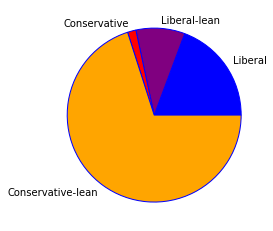

In [20]:
y2_lib = (y2_pred > 0.75).sum()
y2_liblean = (y2_pred > 0.5).sum() - (y2_pred > 0.75).sum()
y2_con = (y2_pred <= 0.25).sum()
y2_conlean = (y2_pred < 0.5).sum() - (y2_pred < 0.25).sum()
total = y2_pred.sum()
labels = ['Liberal', 'Liberal-lean', 'Conservative', 'Conservative-lean']
slices = [y2_lib/total, y2_liblean/total, y2_con/total, y2_conlean/total]
colors = ['blue', 'purple', 'red', 'orange']
print("r/Politics")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'}, colors=colors)

BlazeTV


([<matplotlib.patches.Wedge at 0x17ddd6d55f8>,
 [Text(-0.4897968340282085, 0.9849360696897763, 'Liberal'),
  Text(0.14055623149331198, -1.0909830181026645, 'Liberal-lean'),
  Text(0.8927580968917143, -0.6426375186948585, 'Conservative'),
  Text(1.0538898076717853, -0.3151448449293237, 'Conservative-lean')])

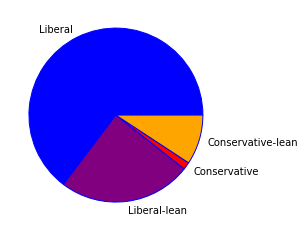

In [21]:
y3_lib = (y3_pred > 0.75).sum()
y3_liblean = (y3_pred > 0.5).sum() - (y3_pred > 0.75).sum()
y3_con = (y3_pred <= 0.25).sum()
y3_conlean = (y3_pred < 0.5).sum() - (y3_pred < 0.25).sum()
total = y3_pred.sum()
# labels = ['Liberal', 'Liberal-lean', 'Conservative', 'Conservative-lean']
slices = [y3_lib/total, y3_liblean/total, y3_con/total, y3_conlean/total]
# colors = ['blue', 'purple', 'red', 'orange']
print("BlazeTV")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'}, colors=colors)

CNN


([<matplotlib.patches.Wedge at 0x17ddd728e48>,
 [Text(0.306724369258499, 1.0563712232463436, 'Liberal'),
  Text(-1.050862992429333, -0.32509532623904025, 'Liberal-lean'),
  Text(-0.15105597710308244, -1.0895788598267835, 'Conservative'),
  Text(0.8267198265327342, -0.725626852051167, 'Conservative-lean')])

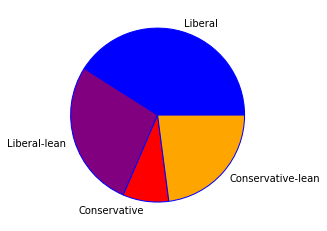

In [22]:
y4_lib = (y4_pred > 0.75).sum()
y4_liblean = (y4_pred > 0.5).sum() - (y4_pred > 0.75).sum()
y4_con = (y4_pred <= 0.25).sum()
y4_conlean = (y4_pred < 0.5).sum() - (y4_pred < 0.25).sum()
total = y4_pred.sum()
# labels = ['Liberal', 'Liberal-lean', 'Conservative', 'Conservative-lean']
slices = [y4_lib/total, y4_liblean/total, y4_con/total, y4_conlean/total]
# colors = ['blue', 'purple', 'red', 'orange']
print("CNN")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'}, colors=colors)

PBS


([<matplotlib.patches.Wedge at 0x17ddd786780>,
 [Text(-0.2364165133745849, 1.0742938295474869, 'Liberal'),
  Text(-0.2769969007029796, -1.0645528248992362, 'Liberal-lean'),
  Text(0.7311812777348573, -0.8218113768317045, 'Conservative'),
  Text(1.0245542444249638, -0.4003605877590746, 'Conservative-lean')])

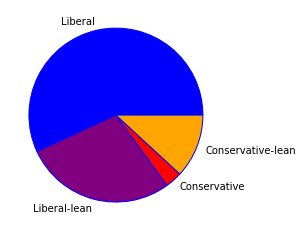

In [23]:
y5_lib = (y5_pred > 0.75).sum()
y5_liblean = (y5_pred > 0.5).sum() - (y5_pred > 0.75).sum()
y5_con = (y5_pred <= 0.25).sum()
y5_conlean = (y5_pred < 0.5).sum() - (y5_pred < 0.25).sum()
total = y5_pred.sum()
# labels = ['Liberal', 'Liberal-lean', 'Conservative', 'Conservative-lean']
slices = [y5_lib/total, y5_liblean/total, y5_con/total, y5_conlean/total]
# colors = ['blue', 'purple', 'red', 'orange']\
print("PBS")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'}, colors=colors)

Fox News


([<matplotlib.patches.Wedge at 0x17ddd7d9f98>,
 [Text(1.0975612145881815, 0.07320778805370481, 'Liberal'),
  Text(-1.0997415689369712, -0.023842851172819063, 'Liberal-lean'),
  Text(1.0966226153784662, -0.08613268508814201, 'Conservative'),
  Text(1.0993843701617598, -0.03679682926599716, 'Conservative-lean')])

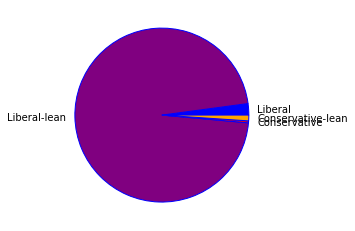

In [24]:
y6_lib = (y6_pred > 0.75).sum()
y6_liblean = (y6_pred > 0.5).sum() - (y6_pred > 0.75).sum()
y6_con = (y6_pred <= 0.25).sum()
y6_conlean = (y6_pred < 0.5).sum() - (y6_pred < 0.25).sum()
total = y6_pred.sum()
# labels = ['Liberal', 'Liberal-lean', 'Conservative', 'Conservative-lean']
slices = [y6_lib/total, y6_liblean/total, y6_con/total, y6_conlean/total]
# colors = ['blue', 'purple', 'red', 'orange']
print("Fox News")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'}, colors=colors)

In [25]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
сon_bigrams = get_top_n_gram(df[df['politicallean'] == 0]['lematized'],(2,2),10)
lib_bigrams = get_top_n_gram(df[df['politicallean'] == 1]['no_punctuation_no_stopwords'],(2,2),10)

df1 = pd.DataFrame(сon_bigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 10 Bigrams in Conservative titles',orientation='h')

df2 = pd.DataFrame(lib_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Bigrams in Liberal titles',orientation='h')


blaze_bigrams = get_top_n_gram(blazedf['lematized'], (2,2),10)

df3 = pd.DataFrame(blaze_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Bigrams in BlazeTV titles',orientation='h')



In [41]:
cnn_bigrams = get_top_n_gram(cnndf['lematized'],(2,2),10)

df4 = pd.DataFrame(cnn_bigrams, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='blue', title='Top 10 Bigrams in CNN titles',orientation='h')

# pbs_bigrams = get_top_n_gram(pbsdf['no_punctuation_no_stopwords'],(2,2),10)

# df5 = pd.DataFrame(pbs_bigrams, columns = ['Text' , 'count'])
# df5.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
#     kind='bar', yTitle='Count', linecolor='black',color='blue', title='Top 10 Bigrams in PBS titles',orientation='h')

# f_bigrams = get_top_n_gram(fdf['no_punctuation_no_stopwords'],(2,2),10)

# df6 = pd.DataFrame(f_bigrams, columns = ['Text' , 'count'])
# df6.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
#     kind='bar', yTitle='Count', linecolor='black',color='blue', title='Top 10 Bigrams in Fox titles',orientation='h')



In [42]:
сon_trigrams = get_top_n_gram(df[df['politicallean'] == 0]['no_punctuation_no_stopwords'],(3,3),10)
lib_trigrams = get_top_n_gram(df[df['politicallean'] == 1]['no_punctuation_no_stopwords'],(3,3),10)

df1 = pd.DataFrame(сon_trigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 10 Trigrams in Conservative titles',orientation='h')

df2 = pd.DataFrame(lib_trigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Trigrams in Liberal titles',orientation='h')